In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [11]:
def rgb2gray(img):
    gray = 0.2126*img[...,2]+0.7152*img[...,1]+0.0722*img[...,0]
    return gray

# ガウシアンフィルタ


In [43]:
def gaussian_filter(sigma=1.3,filter_size=3):
    # フィルタ生成
    out = np.zeros((filter_size,filter_size))
    for y in range(-(filter_size//2),filter_size//2+1):
        for x in range(-(filter_size//2),filter_size//2+1):
            out[y+(filter_size//2),x+(filter_size//2)] = np.exp(-(x**2 + y**2)/(2*(sigma**2)))
    out /= (2 * np.pi * (sigma**2))
    # 正規化
    out/=out.sum()
    return out
            
def gaussian_filtering(img,filter_size=3,sigma=1.3):
    H,W,L = img.shape
    out = np.zeros_like(img)
    # ゼロパディングした画像
    # [(y方向上部,y方向下部),(x方向上部,x方向下部),(z方向上部,z方向下部)]
    pad_img = np.pad(img,[(1,1),(1,1),(0,0)])
    # フィルタを生成
    K = gaussian_filter(sigma,filter_size)

    for y in range(1,H):
        for x in range(1,W):
            for layer in range(L):
                out[y,x,layer] = np.sum(K*pad_img[y-1:y+2,x-1:x+2,layer])
    
    # 出力を[0,255]に収める
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

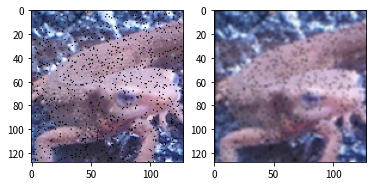

In [44]:
img = cv2.imread("./img/imori_noise.jpg")

out = gaussian_filtering(img)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# メディアンフィルタ

In [14]:
def median_filtering(img,filter_size=3):
    H,W,L = img.shape
    out = np.zeros_like(img)
    # ゼロパディングした画像
    # [(y方向上部,y方向下部),(x方向上部,x方向下部),(z方向上部,z方向下部)]
    pad_img = np.pad(img,[(1,1),(1,1),(0,0)])

    for y in range(1,H):
        for x in range(1,W):
            for layer in range(L):
                out[y,x,layer] = np.median(pad_img[y-1:y+2,x-1:x+2,layer])
                
    return out

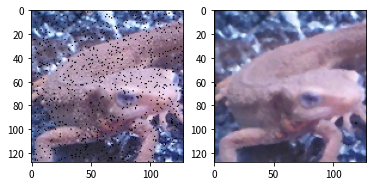

In [15]:
img = cv2.imread("./img/imori_noise.jpg")

out = median_filtering(img)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# 平滑化フィルタ

In [16]:
def smoothing_filtering(img,filter_size=3):
    H,W,L = img.shape
    out = np.zeros_like(img)
    # ゼロパディングした画像
    # [(y方向上部,y方向下部),(x方向上部,x方向下部),(z方向上部,z方向下部)]
    pad_img = np.pad(img,[(1,1),(1,1),(0,0)])

    for y in range(1,H):
        for x in range(1,W):
            for layer in range(L):
                out[y,x,layer] = np.mean(pad_img[y-1:y+2,x-1:x+2,layer])
                
    return out

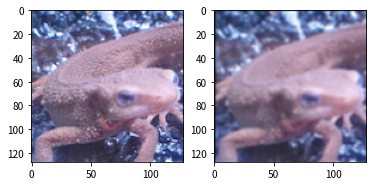

In [18]:
img = cv2.imread("./img/imori.jpg")

out = smoothing_filtering(img)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# モーションフィルタ

In [9]:
def motion_filtering(img):
    H,W,L = img.shape
    out = np.zeros_like(img)
    K = np.array([[1/3,0,0],[0,1/3,0],[0,0,1/3]])
    # ゼロパディングした画像
    # [(y方向上部,y方向下部),(x方向上部,x方向下部),(z方向上部,z方向下部)]
    pad_img = np.pad(img,[(1,1),(1,1),(0,0)])

    for y in range(1,H):
        for x in range(1,W):
            for layer in range(L):
                out[y,x,layer] = np.sum(K*pad_img[y-1:y+2,x-1:x+2,layer])
                
    return out    

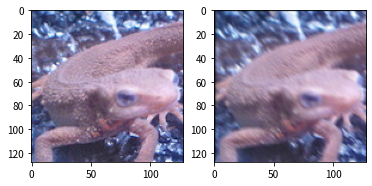

In [10]:
img = cv2.imread("./img/imori.jpg")

out = motion_filtering(img)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# Max-Minフィルタ

In [24]:
def max_min_filtering(img):
    H,W = img.shape
    out = np.zeros_like(img)
    # ゼロパディングした画像
    # [(y方向上部,y方向下部),(x方向上部,x方向下部),(z方向上部,z方向下部)]
    pad_img = np.pad(img,(1,1),)

    for y in range(1,H):
        for x in range(1,W):
            g_max = np.max(pad_img[y-1:y+2,x-1:x+2])
            g_min = np.min(pad_img[y-1:y+2,x-1:x+2])
            out[y,x] = g_max-g_min
                
    return out    

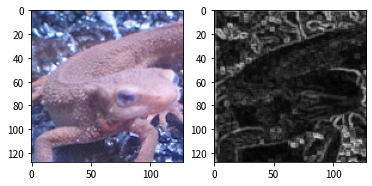

In [25]:
img = cv2.imread("./img/imori.jpg")

# grayscale
gray_img = rgb2gray(img)
out = max_min_filtering(gray_img)
out = out.astype(np.uint8)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# 微分フィルタ

In [34]:
def different_filtering(img):
    Kx = np.array([[0,0,0],[-1,1,0],[0,0,0]])
    Ky = np.array([[0,-1,0],[0,1,0],[0,0,0]])
    
    H,W = img.shape
    out_x = np.zeros_like(img)
    out_y = np.zeros_like(img)
    # ゼロパディングした画像
    # [(y方向上部,y方向下部),(x方向上部,x方向下部),(z方向上部,z方向下部)]
    pad_img = np.pad(img,(1,1),)
    
    for y in range(1,H):
        for x in range(1,W):
            out_x[y,x] = np.sum(Kx*pad_img[y-1:y+2,x-1:x+2])
            out_y[y,x] = np.sum(Ky*pad_img[y-1:y+2,x-1:x+2])
    
    out_x = np.clip(out_x,0,255)
    out_y = np.clip(out_y,0,255)
    return out_x,out_y 

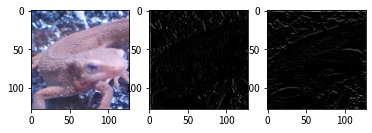

In [35]:
img = cv2.imread("./img/imori.jpg")

# grayscale
gray_img = rgb2gray(img)
out_x,out_y = different_filtering(gray_img)
out_x = out_x.astype(np.uint8)
out_y = out_y.astype(np.uint8)

plt.figure(facecolor="white")
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(out_x, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(out_y, cv2.COLOR_BGR2RGB))
plt.show()

# Sobelフィルタ

In [32]:
def sobel_filtering(img):
    Kx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    Ky = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    
    H,W = img.shape
    out_x = np.zeros_like(img)
    out_y = np.zeros_like(img)
    # ゼロパディングした画像
    # [(y方向上部,y方向下部),(x方向上部,x方向下部),(z方向上部,z方向下部)]
    pad_img = np.pad(img,(1,1),)
    
    for y in range(1,H):
        for x in range(1,W):
            out_x[y,x] = np.sum(Kx*pad_img[y-1:y+2,x-1:x+2])
            out_y[y,x] = np.sum(Ky*pad_img[y-1:y+2,x-1:x+2])
    
    out_x = np.clip(out_x,0,255)
    out_y = np.clip(out_y,0,255)
    return out_x,out_y 

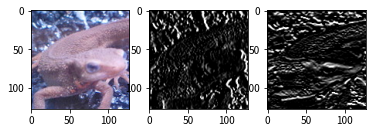

In [36]:
img = cv2.imread("./img/imori.jpg")

# grayscale
gray_img = rgb2gray(img)
out_x,out_y = sobel_filtering(gray_img)
out_x = out_x.astype(np.uint8)
out_y = out_y.astype(np.uint8)

plt.figure(facecolor="white")
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(out_x, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(out_y, cv2.COLOR_BGR2RGB))
plt.show()

# Prewittフィルタ

In [37]:
def prewitt_filtering(img):
    Kx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    Ky = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    
    H,W = img.shape
    out_x = np.zeros_like(img)
    out_y = np.zeros_like(img)
    # ゼロパディングした画像
    # [(y方向上部,y方向下部),(x方向上部,x方向下部),(z方向上部,z方向下部)]
    pad_img = np.pad(img,(1,1),)
    
    for y in range(1,H):
        for x in range(1,W):
            out_x[y,x] = np.sum(Kx*pad_img[y-1:y+2,x-1:x+2])
            out_y[y,x] = np.sum(Ky*pad_img[y-1:y+2,x-1:x+2])
    
    out_x = np.clip(out_x,0,255)
    out_y = np.clip(out_y,0,255)
    return out_x,out_y 

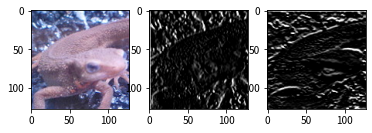

In [38]:
img = cv2.imread("./img/imori.jpg")

# grayscale
gray_img = rgb2gray(img)
out_x,out_y = prewitt_filtering(gray_img)
out_x = out_x.astype(np.uint8)
out_y = out_y.astype(np.uint8)

plt.figure(facecolor="white")
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(out_x, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(out_y, cv2.COLOR_BGR2RGB))
plt.show()

# Laplacianフィルタ

In [39]:
def laplacian_filtering(img):
    H,W = img.shape
    out = np.zeros_like(img)
    K = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    # ゼロパディングした画像
    # [(y方向上部,y方向下部),(x方向上部,x方向下部),(z方向上部,z方向下部)]
    pad_img = np.pad(img,(1,1),)

    for y in range(1,H):
        for x in range(1,W):
            out[y,x] = np.sum(K*pad_img[y-1:y+2,x-1:x+2])
    
    out = np.clip(out,0,255)           
    return out    

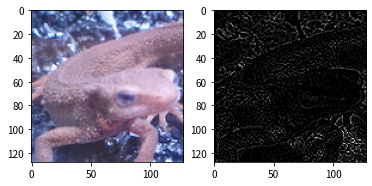

In [40]:
img = cv2.imread("./img/imori.jpg")

# grayscale
gray_img = rgb2gray(img)
out = laplacian_filtering(gray_img)
out = out.astype(np.uint8)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# Embossフィルタ

In [41]:
def emboss_filtering(img):
    H,W = img.shape
    out = np.zeros_like(img)
    K = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
    # ゼロパディングした画像
    # [(y方向上部,y方向下部),(x方向上部,x方向下部),(z方向上部,z方向下部)]
    pad_img = np.pad(img,(1,1),)

    for y in range(1,H):
        for x in range(1,W):
            out[y,x] = np.sum(K*pad_img[y-1:y+2,x-1:x+2])
    
    out = np.clip(out,0,255)           
    return out    

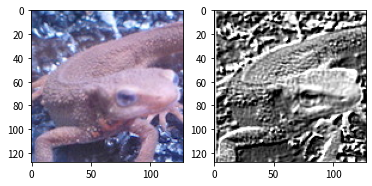

In [42]:
img = cv2.imread("./img/imori.jpg")

# grayscale
gray_img = rgb2gray(img)
out = emboss_filtering(gray_img)
out = out.astype(np.uint8)

plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

# LoGフィルタ

In [56]:
def log_filter(sigma,filter_size):
    # フィルタ生成
    out = np.zeros((filter_size,filter_size))
    for y in range(-(filter_size//2),filter_size//2+1):
        for x in range(-(filter_size//2),filter_size//2+1):
            out[y+(filter_size//2),x+(filter_size//2)] = (x**2 + y**2 - sigma**2)*np.exp(-(x**2 + y**2)/(2*(sigma**2)))
    out /= (2 * np.pi * (sigma**6))
    # 正規化
    out/=out.sum()
    return out    

def log_filtering(img,sigma,filter_size):
    H,W = img.shape
    out = np.zeros_like(img)
    K = log_filter(sigma,filter_size)
    # ゼロパディングした画像
    # [(y方向上部,y方向下部),(x方向上部,x方向下部),(z方向上部,z方向下部)]
    pad_img = np.pad(img,(filter_size//2,filter_size//2),)

    for y in range(filter_size//2,H):
        for x in range(filter_size//2,W):
            out[y,x] = np.sum(K*pad_img[y-filter_size//2:y+filter_size//2+1,x-filter_size//2:x+filter_size//2 +1])
    
    out = np.clip(out,0,255)           
    return out    

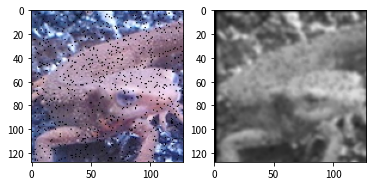

In [60]:
img = cv2.imread("./img/imori_noise.jpg")

# grayscale
gray_img = rgb2gray(img)
out = log_filtering(gray_img,sigma=3,filter_size=5)
out = out.astype(np.uint8)
plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()